In [2]:
################ Data Analysis & Calculation ##############3
import numpy as np 
import pandas as pd 

############ Data Visualization ##############
import matplotlib.pyplot as plt
%matplotlib inline

############### NLP & Search pattern ##################

import re #library in Python provides regular expression matching operations. Regular expressions are powerful tools for pattern matching within strings. 
import nltk 

############### Ignore Warning #############3
import warnings
warnings.filterwarnings('ignore')

In [3]:
farmer = pd.read_csv(r"D:\farmer.csv")

farmer.shape

(1000, 10)

In [4]:
farmer.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,BeantMrahar,NaN,Twitter for Android,NaN,2021-04-12 03:13:34,False,63,Today Hashtag \nRetweet \n\n#DelhiPolice_Tortu...,0,False
1,rumsomal,"brampton, universe",Twitter for Android,NaN,2021-04-12 03:13:32,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False
2,rumsomal,"brampton, universe",Twitter for Android,NaN,2021-04-12 03:13:21,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False
3,drd_bee,ਮੋਗਾ (ਚੜ੍ਹਦਾ ਪੰਜਾਬ),Twitter for Android,NaN,2021-04-12 03:13:21,False,628,"If we lose this fight, first we will become co...",0,False
4,__Argha__,NaN,Twitter for Android,NaN,2021-04-12 03:13:18,False,42,'Disgraceful' and 'Discourteous' act of Delhi ...,0,False


In [5]:
data = pd.DataFrame(farmer.text)
data

,text
0,Today Hashtag \nRetweet \n\n#DelhiPolice_Tortu...
1,Delhi police is the Black Hand of BJP \n#Delhi...
2,Delhi police is the Black Hand of BJP \n#Delhi...
3,"If we lose this fight, first we will become co..."
4,'Disgraceful' and 'Discourteous' act of Delhi ...
...,...
995,"Yesterday some bhakts were saying ""tu kabhi kh..."
996,If @capt_amarinder and @PunjabPoliceInd had ap...
997,Support farmers\nuse MAXIMUM hashtag \n\n#Del...
998,Haryana people giving tough to BJP government....


In [7]:
data.iloc[2,0]

'Delhi police is the Black Hand of BJP \n#DelhiPolice_TorturingFarmers\n#FarmersProtest https://t.co/N0K2DSR7TR'

### Converted to Lower

In [8]:
data.text = data.text.str.lower()

In [9]:
data

,text
0,today hashtag \nretweet \n\n#delhipolice_tortu...
1,delhi police is the black hand of bjp \n#delhi...
2,delhi police is the black hand of bjp \n#delhi...
3,"if we lose this fight, first we will become co..."
4,'disgraceful' and 'discourteous' act of delhi ...
...,...
995,"yesterday some bhakts were saying ""tu kabhi kh..."
996,if @capt_amarinder and @punjabpoliceind had ap...
997,support farmers\nuse maximum hashtag \n\n#del...
998,haryana people giving tough to bjp government....


## Removing Url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [11]:
data['text'] = data['text'].replace(r'http\S+|www\S+', '',regex=True)

In [13]:
data.iloc[2,0]

'delhi police is the black hand of bjp \n#delhipolice_torturingfarmers\n#farmersprotest '

## Remove punctuation

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuation(abc):
    text_nopunt = "".join([
        c for c in abc if c not in string.punctuation 
    ])
    return text_nopunt

In [17]:
data.iloc[1,0]

'delhi police is the black hand of bjp \n#delhipolice_torturingfarmers\n#farmersprotest '

In [18]:
data.text = data.text.apply(lambda x : remove_punctuation(x))

In [19]:
data.iloc[1,0]

'delhi police is the black hand of bjp \ndelhipolicetorturingfarmers\nfarmersprotest '

## Remove Number

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [20]:
data.iloc[57,0]

'bhupinderq33n tractor2twitr gillsukhmani111 navdeepsingh77 harshkumarbhal1 monicagill1 mahuamoitra… '

In [21]:
data['text'] = data['text'].replace(r'\d+','',regex=True)

In [22]:
data.iloc[57,0]

'bhupinderqn tractortwitr gillsukhmani navdeepsingh harshkumarbhal monicagill mahuamoitra… '

## Removing Stop Words

In [23]:
import nltk

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords
stop = stopwords.words('English')

print("No.of StopWords :",len(stop))
stop

No.of StopWords : 198


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [27]:
data.text = data.text.apply(lambda x : ' '.join([c for c in x.split() if c not in (stop)]) )

In [28]:
data.iloc[991,0]

'delhi police arresting people punjab belong jurisdiction punjab govt sleeping…'

## Common Words

In [29]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [30]:
def clean_text_round2(text):
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) #remove delhipolice
    text =  re.sub('bjp|jp|BJP', '', text) #remove delhipolice
    text =  re.sub('farmer|farmers|farm|farmed','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like S or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad 
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you word tokens 
                    if w.lower() in words)  # dictionary     
    return text

In [31]:
data.iloc[991,0]

'delhi police arresting people punjab belong jurisdiction punjab govt sleeping…'

In [32]:
# Let's take a look at the updated text
data = pd.DataFrame(data.text.apply(lambda x: clean_text_round2(x)))
data.iloc[991,0]

'arresting people belong jurisdiction sleeping'

## Lemmatization

In [33]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer 

In [35]:
def lemmatize_text(abc):
    return [lemmatizer.lemmatize(w,"v") ## v = verb   = arrest
            for w in w_tokenizer.tokenize(abc)]  # word tokenizer  w = arresting

In [36]:
data.iloc[991,0]

'arresting people belong jurisdiction sleeping'

In [37]:
data.text = data.text.apply(lambda x :' '.join(lemmatize_text(x)))  # text = x
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

## Strip extra whitespace

In [38]:
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

In [40]:
data.text = data.text.str.rstrip()
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

## Removing Duplicate Row

In [41]:
data = data.drop_duplicates()
data.shape

(538, 1)

In [42]:
data.head(10)

,text
0,today
1,black hand
3,lose fight first become corporate eventually c...
4,disgraceful discourteous act towards whose str...
5,shameful disgust act
6,
8,convert gang let stand unite
9,don give moron want save democracy
10,doubt
11,save


## Document-Term Matrix
It is used to find most important word in a dataset

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # dtm = Term
data_cv = cv.fit_transform(data.text)  # Term & Count
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # document term matrix
tdm = data_dtm.transpose()
tdm

,0,1,2,3,4,5,6,7,8,9,...,528,529,530,531,532,533,534,535,536,537
abduct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yesterday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
youth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,529,530,531,532,533,534,535,536,537,freq
abduct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
abuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,529,530,531,532,533,534,535,536,537,freq
0,abduct,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,abuse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,accept,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
tdm1 = tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

,Word,freq
651,torture,88
611,support,44
553,shame,35
599,stop,34
47,beat,32
...,...,...
285,heinous,1
284,heavily,1
282,heartbreaking,1
281,heart,1


## Barplot

In [47]:
w = tdm1[tdm1['freq'] >20]
w

,Word,freq
651,torture,88
611,support,44
553,shame,35
599,stop,34
47,beat,32
242,fight,32
262,government,26
712,world,25
326,innocent,24
593,stand,22


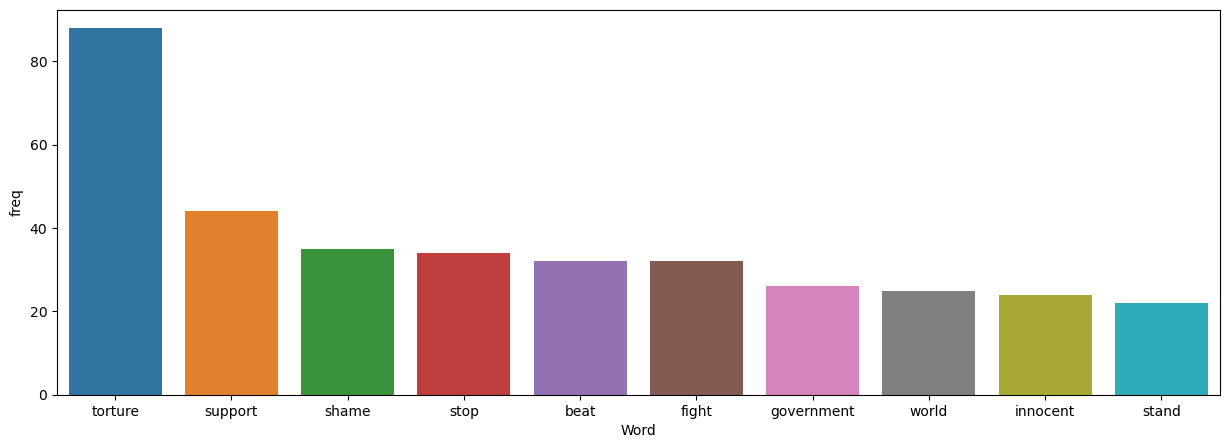

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))
fg = sns.barplot(x='Word', y='freq',data=w)

In [49]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 15224 words in the combination of all review.


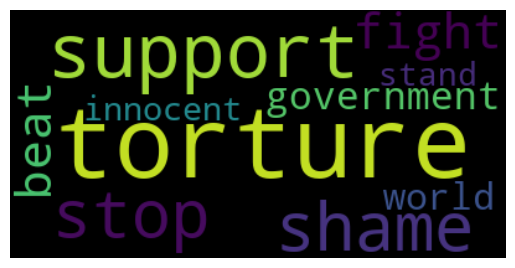

In [119]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Generate a word cloud image
abc = WordCloud(stopwords=set(STOPWORDS),
                      background_color="black",
                      collocations=False,
                      mode="RGBA",  # r = red , g = green , b = blue
                      max_words=10).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

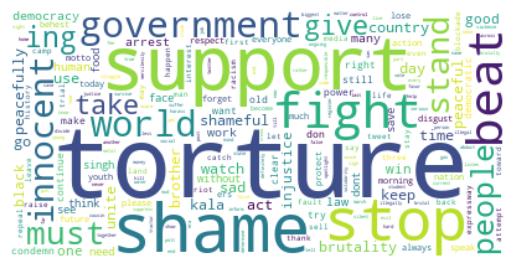

In [51]:
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
abc = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      mode="RGBA",
                      max_words=15224).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis

In [111]:
from textblob import TextBlob

In [112]:
data['polarity'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity) # polarity range -1 to +1
data.head(5)

,text,polarity
0,today,0.000000
1,black hand,-0.166667
3,lose fight first become corporate eventually c...,0.125000
4,disgraceful discourteous act towards whose str...,-0.650000
5,shameful disgust act,0.000000


In [113]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,text,polarity,Sentiment
0,today,0.000000,Positive
1,black hand,-0.166667,Negative
3,lose fight first become corporate eventually c...,0.125000,Positive
4,disgraceful discourteous act towards whose str...,-0.650000,Negative
5,shameful disgust act,0.000000,Positive


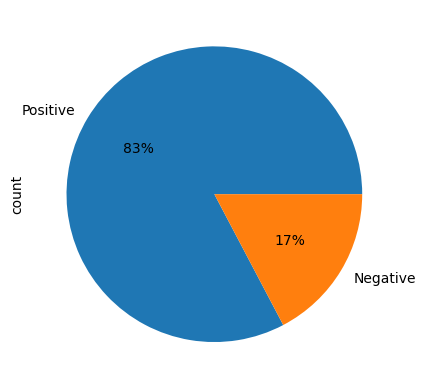

In [120]:
data.Sentiment.value_counts().plot.pie(autopct="%0.0f%%");

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer = TfidfVectorizer(use_idf=True,stop_words='english',analyzer='word') 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(data.text)
feature_names = cv.get_feature_names_out()  ## EVERY WORD NAME
abc = tfidf_vectorizer_vectors.transpose()

In [116]:
output=pd.DataFrame.sparse.from_spmatrix(abc,index=feature_names)
output.reset_index(inplace=True)
output.rename(columns = {'index':'Word'}, inplace = True) # RENAMING
output

,Word,0,1,2,3,4,5,6,7,8,...,528,529,530,531,532,533,534,535,536,537
0,abduct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,able,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,absolutely,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,abuse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,accept,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
720,yesterday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.351783,0.0,0.0
721,young,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
722,youth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
